In [235]:
ls

DataSet.xlsx  foo.png  README.md  test.ipynb  users time series.png


In [358]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_excel('DataSet.xlsx')
df[-5:]
    

,ID,Date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,new,registered,total
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.040972,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,1.683333,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,1.609028,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,4.010417,0.154846,439,2290,2729


/usr/lib/python3/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


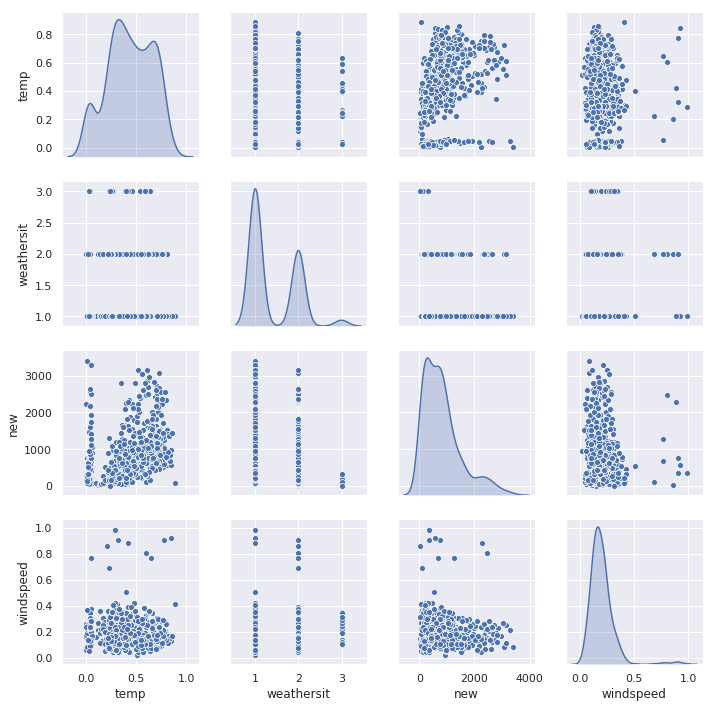

In [355]:
from scipy.stats import norm, exponnorm
df_for_plot = df[['temp', 'weathersit', 'new', 'windspeed']]
ax = sns.pairplot(df_for_plot[df['temp']<=1][df['windspeed']<=1], 
            diag_kind="kde");

ax.savefig('visualisations.png')

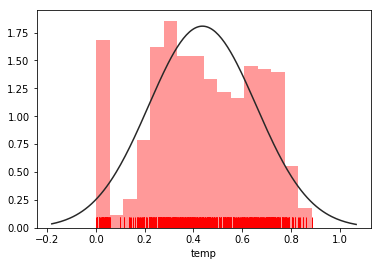

In [238]:
from scipy.stats import norm
sns.distplot(df['temp'][df['temp']<=1],kde=False, rug=True, fit=norm, bins =16, color = 'r')

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


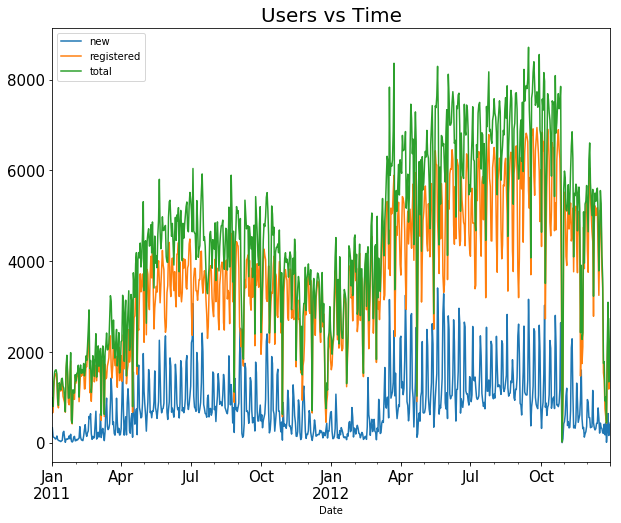

In [246]:
pie = df.iloc[:,-3:].plot(x=df.iloc[:,1], figsize=(10,8) , title = 'Users vs Time', fontsize = 15)
pie.title.set_size(20)
fig = pie.get_figure()
fig.savefig('users time series')

# PCA

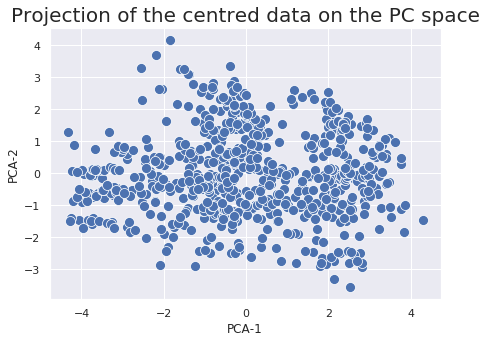

In [343]:

import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from datetime import date

X = df.as_matrix(columns=df.columns[df.columns!='Date'])
N = len(df.columns) -1

std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data

Y = X - np.ones((N))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T

Z = Y @ V[:,:2]


data = pd.DataFrame({'PCA-1':Z[:,0],'PCA-2':Z[:,1]})  

ax = sns.scatterplot(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data)
ax.set_title('Projection of the centred data on the PC space', fontsize = 20)
sns.set(rc={'figure.figsize':(1,1)})
ax = ax.get_figure()
ax.savefig('projection_data.png')

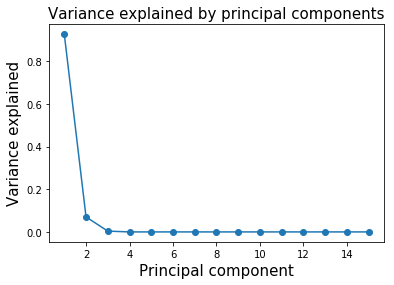

In [189]:

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'o-')
plt.title('Variance explained by principal components',fontsize = 15);
plt.xlabel('Principal component', fontsize = 15);
plt.ylabel('Variance explained',fontsize = 15);

plt.show()
plt.savefig('foo.png')

